### 내부 공선성 해결
    - 신경망층의 출력값이 가질 수 있는 범위, 즉 출력값 분포의 범위를 줄여주어 
        불확실성을 어느 정도 감소 시키는 방법
    - 별도의 규제화나 드롭아웃을 사용하지 않아도 어느정도 효과를 볼 수 있음
    - 순서 : Dense 또는 Conv2D -> BatchNormalization -> Activation

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization, Activation
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score
from tensorflow.keras.datasets import cifar10

#### 데이터 로드

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#### 데이터 정규화

In [5]:
x_train = x_train/255
x_test = x_test/255

#### y train 인코딩

In [6]:
y_trainone = to_categorical(y_train)

#### 학습

In [7]:
model = Sequential()
model.add( Conv2D( 32, kernel_size=(3,3), strides = 1, 
                  input_shape=(32,32,3), padding='same') )
model.add( BatchNormalization())
model.add( Activation('relu'))
model.add( MaxPool2D( pool_size=(2,2) ) )

model.add( Conv2D( 64, kernel_size=(3,3), strides = 1, input_shape=(32,32,3), 
             padding='same') )
model.add( BatchNormalization())
model.add( Activation('relu'))
model.add( MaxPool2D( pool_size=(2,2) ) )

model.add( Conv2D( 128, kernel_size=(3,3), strides = 1, input_shape=(32,32,3), 
                   padding='same') )
model.add( BatchNormalization())
model.add( Activation('relu'))
model.add( MaxPool2D( pool_size=(2,2) ) )

model.add( Flatten( ) )
model.add( Dense( units=64) )
model.add( BatchNormalization())
model.add( Activation('relu'))
model.add( Dense( units=10, activation = 'softmax') )
model.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
h = model.fit( x_train, y_trainone, epochs=10, validation_split= 0.2 )

Epoch 1/10
1250/1250 [==============================] - 35s 28ms/step - loss: 1.1954 - acc: 0.5776 - val_loss: 1.5818 - val_acc: 0.4742
Epoch 2/10
1250/1250 [==============================] - 33s 26ms/step - loss: 0.8481 - acc: 0.7019 - val_loss: 1.0784 - val_acc: 0.6381
Epoch 3/10
1250/1250 [==============================] - 33s 27ms/step - loss: 0.7008 - acc: 0.7546 - val_loss: 1.1379 - val_acc: 0.6348
Epoch 4/10
1250/1250 [==============================] - 34s 27ms/step - loss: 0.5923 - acc: 0.7948 - val_loss: 0.7856 - val_acc: 0.7316
Epoch 5/10
1250/1250 [==============================] - 33s 26ms/step - loss: 0.5053 - acc: 0.8261 - val_loss: 0.7857 - val_acc: 0.7383
Epoch 6/10
1250/1250 [==============================] - 33s 26ms/step - loss: 0.4242 - acc: 0.8529 - val_loss: 0.8947 - val_acc: 0.7180
Epoch 7/10
1250/1250 [==============================] - 33s 27ms/step - loss: 0.3516 - acc: 0.8784 - val_loss: 0.9835 - val_acc: 0.7085
Epoch 8/10
1250/1250 [==========================

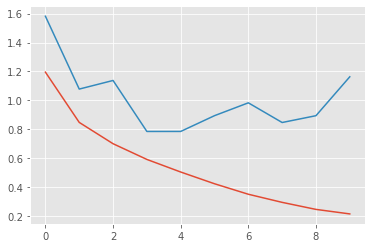

In [8]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.show()